# Lecture 10 Unsupervised Learning


## Household Power Consumption Dataset Analysis

### Introduction

The Household Power Consumption dataset provides a valuable opportunity to explore and analyze energy usage patterns within a residential setting. This dataset contains measurements of various electrical quantities and sub-metering values collected over a period of nearly four years (December 2006 to November 2010) from a single household. The data was recorded at a high frequency of one-minute intervals, resulting in a rich and granular time-series dataset.

The dataset encompasses the following features:

- **Global Active Power**: The household's global minute-averaged active power consumption (in kilowatts).
- **Global Reactive Power**: The household's global minute-averaged reactive power (in kilowatts).
- **Voltage**: The minute-averaged voltage (in volts).
- **Global Intensity**: The household's global minute-averaged current intensity (in amperes).
- **Sub-metering 1**: Energy sub-metering for the kitchen, which includes appliances like a dishwasher, oven, and microwave (in watt-hours of active energy).
- **Sub-metering 2**: Energy sub-metering for the laundry room, which includes appliances like a washing machine, dryer, refrigerator, and lights (in watt-hours of active energy).
- **Sub-metering 3**: Energy sub-metering for an electric water heater and an air-conditioner (in watt-hours of active energy).

By analyzing this dataset, we can gain insights into various aspects of household energy consumption, including:

1. **Overall Consumption Patterns**: Explore the household's energy consumption trends over time, identify periods of high and low usage, and potentially correlate them with external factors (e.g., seasons, holidays, or occupancy patterns).

2. **Appliance-level Analysis**: Investigate the energy consumption patterns of specific appliances or appliance groups (kitchen, laundry room, water heater, and air conditioning) by leveraging the sub-metering data.

3. **Clustering and Segmentation**: Apply unsupervised learning techniques, such as K-Means clustering, to segment the data into distinct energy consumption profiles, potentially revealing different household behaviors or usage scenarios.

4. **Forecasting and Anomaly Detection**: Develop models to forecast future energy consumption or detect anomalies in the data, which could assist in optimizing energy usage, identifying maintenance issues, or implementing energy-saving strategies.

By conducting a comprehensive analysis of this dataset, we can uncover valuable insights into residential energy consumption patterns, contributing to a better understanding of household energy usage and potentially informing energy-efficient practices and policies.

### Further explianation of some of the confusing terms:

1. **Active Power (Global_active_power):**
Active power, measured in kilowatts (kW), is the real power consumed by electrical devices to perform actual work, such as running a motor, heating an oven, or powering a light bulb. It's the power that gets converted into useful work or heat. The higher the active power, the more energy is being consumed.

2. **Reactive Power (Global_reactive_power):**
Reactive power, measured in kilovars (kVAr), is the power required to produce and sustain magnetic fields in inductive loads like motors, transformers, and fluorescent lamps. It doesn't perform any useful work but is necessary for the operation of these devices. Reactive power tends to increase with inductive loads and can contribute to energy losses in the system.

3. **Voltage (Voltage):**
Voltage, measured in volts (V), is the electrical potential difference that drives the flow of electric current in a circuit. It represents the "pressure" that pushes the electrons through the conductors. Voltage is an important parameter in power systems, and deviations from the nominal voltage can affect the performance and efficiency of electrical devices.

4. **Global Intensity (Global_intensity):**
Global intensity, measured in amperes (A), represents the total electric current flowing through the household's electrical system. It's the sum of the currents drawn by all the connected electrical loads. Higher current intensity typically indicates higher power consumption, as power is the product of voltage and current.

To summarize:
- **Active Power** is the real power consumed by electrical devices to perform useful work or generate heat.
- **Reactive Power** is the power required to produce and sustain magnetic fields in inductive loads but doesn't perform any useful work.
- **Voltage** is the electrical potential difference that drives the flow of electric current.
- **Global Intensity** is the total electric current flowing through the household's electrical system, which is directly related to power consumption.

---

Next we are going to start working on the data. First of all, import the dataset.

In [22]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Fetch the dataset from UCI
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# Extract the data and targets as DataFrames
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets


/Users/wenjiezhu/opt/anaconda3/envs/mbapython/lib/python3.9/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [24]:
# Print the metadata
print(individual_household_electric_power_consumption.metadata)

# Print the variable information
print(individual_household_electric_power_consumption.variables)

{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

Do some house cleaning of the data

In [25]:
# Handle missing values (e.g., drop rows with missing values)
household_power = household_power.dropna()

In [26]:
# Select relevant features for clustering
relevant_features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = household_power[relevant_features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Because the data have over 2M records, we would only use a subset of it for our project.

In [27]:
# Sample a subset of the data 
sample_size = 10_000  # Calculate the sample size (10% of the total rows)
X_sample = X.sample(n=sample_size, random_state=42)  # Sample the data randomly

# Scale the sampled data
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

### 10.1.1 2. Silhouette Analysis

The Silhouette analysis is a method for determining the optimal number of clusters. It calculates the silhouette coefficient, which is a measure of how well each data point fits into its assigned cluster compared to other clusters. The optimal number of clusters is the one that maximizes the silhouette coefficient.

Here's an example code to compute the silhouette scores for different values of k:

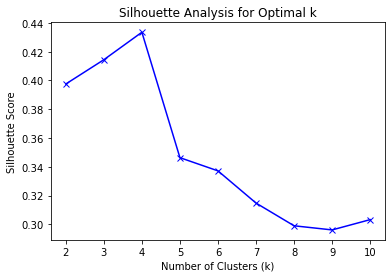

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list of number of clusters to try
k_range = range(2, 11)

# Initialize an empty list to store silhouette scores for each k
silhouette_scores = []

# Iterate over the range of k values
for k in k_range:
    # Create a KMeans object with the current value of k
    kmeans = KMeans(n_clusters=k)
    
    # Fit the KMeans model to the scaled data
    cluster_labels = kmeans.fit_predict(X_sample_scaled)
    
    # Compute the silhouette score for the current k
    score = silhouette_score(X_sample_scaled, cluster_labels)
    
    # Append the silhouette score for the current k to the list
    silhouette_scores.append(score)

# Plot the silhouette scores against the number of clusters
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

As we could observe, a cluster of 4 is the most appropriate one since it has the highst Silhouette score. 

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X_sample_scaled)

We analyze the clusters

In [31]:
from sklearn.decomposition import PCA
# Analyze the clusters
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

cluster_sizes = [sum(labels == i) for i in range(4)]
print("Cluster Sizes:", cluster_sizes)

Cluster Centers:
 [[ 0.66031093  0.07482651 -0.33451446  0.64232541 -0.15316552 -0.14973986
   1.18239563]
 [-0.61110014 -0.10381124  0.28515346 -0.60332967 -0.18217031 -0.1572825
  -0.7231627 ]
 [ 2.64185169  0.7794826  -1.10169114  2.66697313  5.56098114 -0.01678046
   0.59676113]
 [ 2.59038215  0.56581629 -1.00771347  2.61834205  0.12359475  5.59418041
   0.59991789]]
Cluster Sizes: [3416, 6036, 286, 262]


Based on the cluster centers and cluster sizes you provided, we can interpret the characteristics of each cluster:

Cluster 0 (Size: 3416):

- The slightly above-average values for global_active_power, global_reactive_power, voltage, and global_intensity suggest that there is some level of electrical activity and energy consumption happening in the household.
- The slightly below-average sub-metering values for the kitchen, laundry room, and other appliances indicate that the energy consumption is not primarily driven by these high-power appliances.
- This cluster could represent periods when someone is at home, engaging in regular activities that require moderate energy usage, such as running lights, electronics, or small appliances.

Cluster 1 (Size: 6036):

- The slightly below-average values for global_active_power, global_reactive_power, voltage, and global_intensity suggest lower overall energy consumption.
- The slightly below-average sub-metering values also point towards minimal usage of major appliances like those in the kitchen or laundry room.
- This cluster could potentially represent periods when the household is unoccupied or when the occupants are not actively using energy-intensive appliances or devices.

Cluster 2 (Size: 286):
- This cluster has significantly higher values for global_active_power, global_reactive_power, voltage, global_intensity, and sub_metering_1 (kitchen appliances).
- This cluster likely represents periods of high energy consumption, potentially when multiple high-power appliances (like the oven, dishwasher, and microwave) are in use simultaneously.

Cluster 3 (Size: 262):
- This cluster has significantly higher values for global_active_power, global_reactive_power, voltage, global_intensity, and sub_metering_2 (laundry room appliances).
- This cluster likely represents periods of high energy consumption in the laundry room, potentially when the washing machine, dryer, and other appliances are running.

From the cluster sizes, we can see that the majority of data points (6038) fall into Cluster 1, which represents lower energy consumption periods. Clusters 2 and 3, though smaller in size, capture the periods of high energy consumption in the kitchen and laundry room, respectively.

This analysis provides insights into the different energy consumption patterns present in the household, allowing you to identify periods of high and low energy usage, as well as the potential sources (e.g., kitchen appliances, laundry room appliances) contributing to the high consumption periods.

Keep in mind that these interpretations are based solely on the cluster centers and sizes. For a more comprehensive understanding, you may want to explore the cluster statistics (mean values of each feature per cluster) and visualize the cluster assignments to gain additional insights.